Data comprised of daily climate records from land surface stations near Ann Arbor, Michigan, United States from The National Centers for Environmental Information' Daily Global Historical Climatology Network

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv') #read the csv file
df['Data_Value'] = df['Data_Value']/10 #convert temperatures to °C
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)  #convert to date type
df = df.sort_values('Date')  #sort dataframe by date
dftmax = df[df['Element']=='TMAX'] #get dataframe of only TMAX values
dftmin = df[df['Element']=='TMIN'] #get dataframe of only TMIN values
observation_dates = np.arange('2008-01-01', '2009-01-01', dtype='datetime64[D]')

Get maximum temperatures for each day in the period from 2005 to 2014

In [2]:
dftmax14 = dftmax[dftmax['Date']<'2015-01-01'].groupby('Date')['Data_Value'].max() #extract of TMAX of each day from 2005 to 2014
dftmax14.index = dftmax14.index.strftime('%m-%d') #set index to month-day format instead of year-m-d
tmax1y = dftmax14.groupby(dftmax14.index).max() #TMAX in a one year span resume for data from 2005 to 2014

Get minimum temperatures for each day in the period from 2005 to 2014

In [3]:
dftmin14 = dftmin[dftmin['Date']<'2015-01-01'].groupby('Date')['Data_Value'].min() #extract of TMIN of each day from 2005 to 2014
dftmin14.index = dftmin14.index.strftime('%m-%d') #set index to month-day format instead of year-m-d
tmin1y = dftmin14.groupby(dftmin14.index).min() #TMIN in a one year span resume for data from 2005 to 2014

In [4]:
dftmax15 = dftmax[dftmax['Date'] >= '2015-01-01'].groupby('Date')['Data_Value'].max() #extract of TMAX of each day in 2015
dftmax15.index = dftmax15.index.strftime('%m-%d')
dftmax15.loc['02-29'] = tmax1y['02-29']
dftmax15.sort_index(inplace=True)
observation_dates_tmax15 = observation_dates[dftmax15.values > tmax1y.values]
dftmax15 = dftmax15[dftmax15.values > tmax1y.values]

In [5]:
dftmin15 = dftmin[dftmin['Date'] >= '2015-01-01'].groupby('Date')['Data_Value'].min() #extract of TMIN of each day in 2015
dftmin15.index = dftmin15.index.strftime('%m-%d')
dftmin15.loc['02-29'] = tmin1y['02-29']
dftmin15.sort_index(inplace=True)
observation_dates_tmin15 = observation_dates[dftmin15.values < tmin1y.values]
dftmin15 = dftmin15[dftmin15.values < tmin1y.values]

<IPython.core.display.Javascript object>


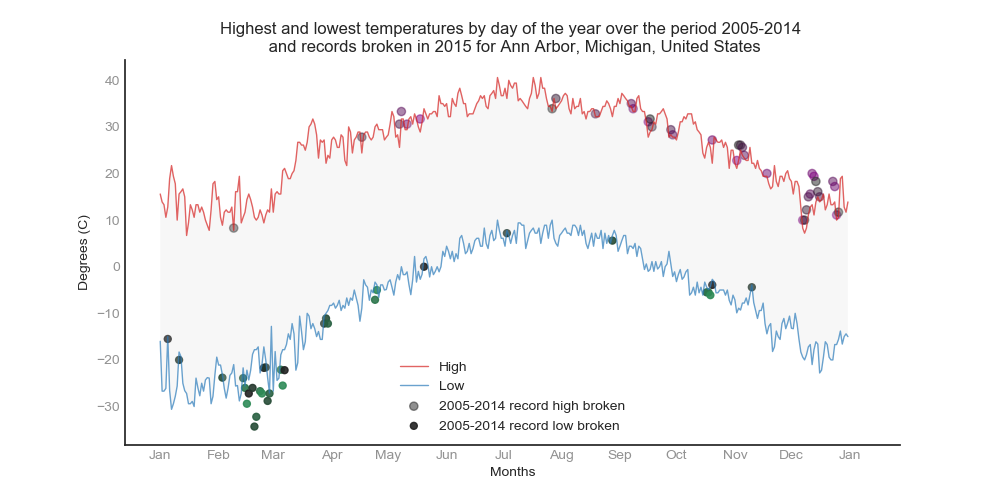

In [7]:
import seaborn as sns
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b")

sns.set_style("white")

maxv=tmax1y.values
minv=tmin1y.values

fig = plt.figure(figsize=(10,5))
ax = plt.gca()
ax.scatter(observation_dates_tmax15 , dftmax15.values, s=35, c=sns.dark_palette("purple"), alpha=0.5, label='2005-2014 record high broken' )
ax.scatter(observation_dates_tmin15 , dftmin15.values, s=25, c=sns.dark_palette("seagreen"), alpha=0.9, label='2005-2014 record low broken' )
ax.plot(observation_dates, tmax1y.values, '-', color= sns.color_palette("Reds")[-2], label='High', alpha=0.7, linewidth=1)
ax.plot(observation_dates, tmin1y.values, '-', color= sns.color_palette("Blues")[-2], label='Low', alpha=0.7, linewidth=1)

ax.set_xlabel('Months')
ax.set_ylabel('Degrees (C)')
ax.set_title('Highest and lowest temperatures by day of the year over the period 2005-2014 \n and records broken in 2015 for Ann Arbor, Michigan, United States')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.xticks(alpha=0.5)
plt.yticks(alpha=0.5)
sns.despine()
ax.legend()
ax.fill_between(observation_dates, 
                       maxv, minv, 
                       facecolor=sns.light_palette("lightgrey")[4], 
                       alpha=0.2)
#fig.savefig("temp.png", dpi=1200)